# Homework 3

### Name: Maida Raza
### Collaborator:


DATA 201

Summer 2025

Tufts University

### Packages

In [193]:
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf

In [194]:
# Extracting DJI data from Yahoo Finance
data = yf.download('^DJI', start='2021-01-01', end='2024-01-01')

[*********************100%***********************]  1 of 1 completed


## Question 1: Trend Analysis of Closing Prices
### Objective: 
- Analyze the trend of closing prices of the ^DJI index over the specified period.

### Instructions:

- Use Pandas to manipulate the data and extract Closing Prices.
- Use Matplotlib or Seaborn to visualize the trend of closing prices from 2021-01-01 to 2024-01-01.

In [195]:
# View the yfinance data to get a sense of its layout
data


Price,Close,High,Low,Open,Volume
Ticker,^DJI,^DJI,^DJI,^DJI,^DJI
Date,,,,,
2021-01-04,30223.890625,30674.279297,29881.820312,30627.470703,475080000
2021-01-05,30391.599609,30504.890625,30141.779297,30204.250000,350910000
2021-01-06,30829.400391,31022.650391,30313.070312,30362.779297,500430000
2021-01-07,31041.130859,31193.400391,30897.859375,30901.179688,427810000
2021-01-08,31097.970703,31140.669922,30793.269531,31069.580078,381150000
...,...,...,...,...,...
2023-12-22,37385.968750,37534.519531,37268.878906,37349.269531,252970000
2023-12-26,37545.328125,37617.988281,37371.828125,37405.898438,212420000


In [196]:
# Extracting Closing Price
closing_price = data['Close']
closing_price.head()


Ticker,^DJI
Date,
2021-01-04,30223.890625
2021-01-05,30391.599609
2021-01-06,30829.400391
2021-01-07,31041.130859
2021-01-08,31097.970703


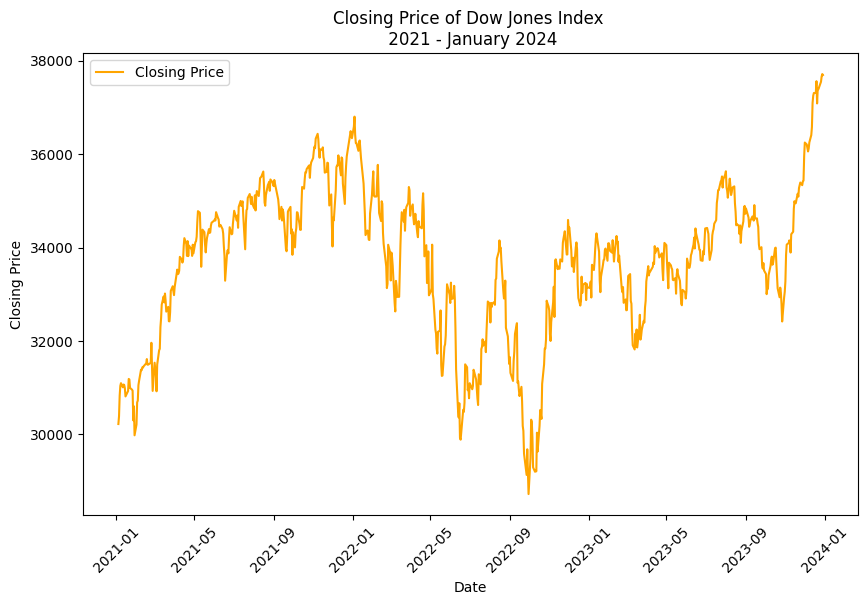

In [197]:
# making plot using Pandas

plt.figure(figsize=(10,6))
plt.plot(closing_price.index, closing_price.values, label = 'Closing Price', color = 'orange') 
plt.title('Closing Price of Dow Jones Index \n 2021 - January 2024') #\n creates room for the subtitle
plt.legend() #this calls the label in plt.plot
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45) #this rotates the x-axis labels
plt.show()


## Question 2: Moving Average Analysis
### Objective: 
- Determine the short-term and long-term moving averages and analyze potential buy/sell signals.

### Instructions:

- Calculate the short-term (e.g., 50 days) and long-term (e.g., 200 days) moving averages.
- Use Matplotlib to visualize the moving averages along with the closing prices.


In [198]:
'Moving/Rolling Average is a technique used to smooth out short-term fluctuations and highlight longer-terms trends or cycles in the data. It is usually used in time-series data analysis (Finance, Economics, Weather)'
# 2. Calculate the short-term (50 day) and long term (200 days) moving average
short_term_moving_ave = closing_price.rolling(window=50).mean()
short_term_moving_ave #NaN demonstrates that certain values were not available


Ticker,^DJI
Date,
2021-01-04,NaN
2021-01-05,NaN
2021-01-06,NaN
2021-01-07,NaN
2021-01-08,NaN
...,...
2023-12-22,34986.161250
2023-12-26,35063.662031
2023-12-27,35137.101641


In [199]:
#Calculating the long-term moving average
long_term_moving_ave = closing_price.rolling(window=200).mean()
long_term_moving_ave

Ticker,^DJI
Date,
2021-01-04,NaN
2021-01-05,NaN
2021-01-06,NaN
2021-01-07,NaN
2021-01-08,NaN
...,...
2023-12-22,34184.741572
2023-12-26,34212.920010
2023-12-27,34242.106904


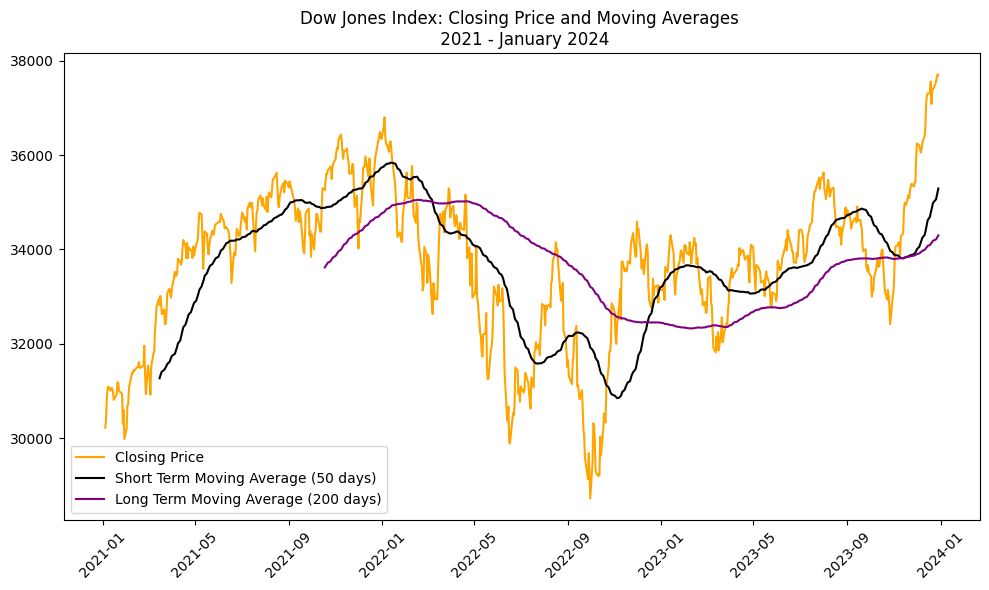

In [200]:
# 2. Use Matplotlib to visualize the moving averages along with the closing prices.
plt.figure(figsize=(10,6))
plt.plot(closing_price.index, closing_price.values, label = 'Closing Price', color = 'orange')
plt.plot(short_term_moving_ave, label = 'Short Term Moving Average (50 days)', color = 'black')
plt.plot(long_term_moving_ave, label = 'Long Term Moving Average (200 days)', color = 'purple')
plt.xticks(rotation = 45)
plt.title('Dow Jones Index: Closing Price and Moving Averages \n 2021 - January 2024')
plt.tight_layout()
plt.legend()

## Question 3: Daily Return Analysis
### Objective: 
- Compute and analyze daily returns of the ^DJI index to evaluate daily performance.

### Instructions:

- Calculate daily returns using the ‘Close’ column.
- Use Seaborn or Matplotlib to visualize the distribution of daily returns through a histogram.

In [201]:
# 3. Calculate daily returns using the ‘Close’ column. We will use the percentage change method to calculate the returns
daily_returns = closing_price.pct_change()
daily_returns


Ticker,^DJI
Date,
2021-01-04,NaN
2021-01-05,0.005549
2021-01-06,0.014405
2021-01-07,0.006868
2021-01-08,0.001831
...,...
2023-12-22,-0.000491
2023-12-26,0.004263
2023-12-27,0.002962


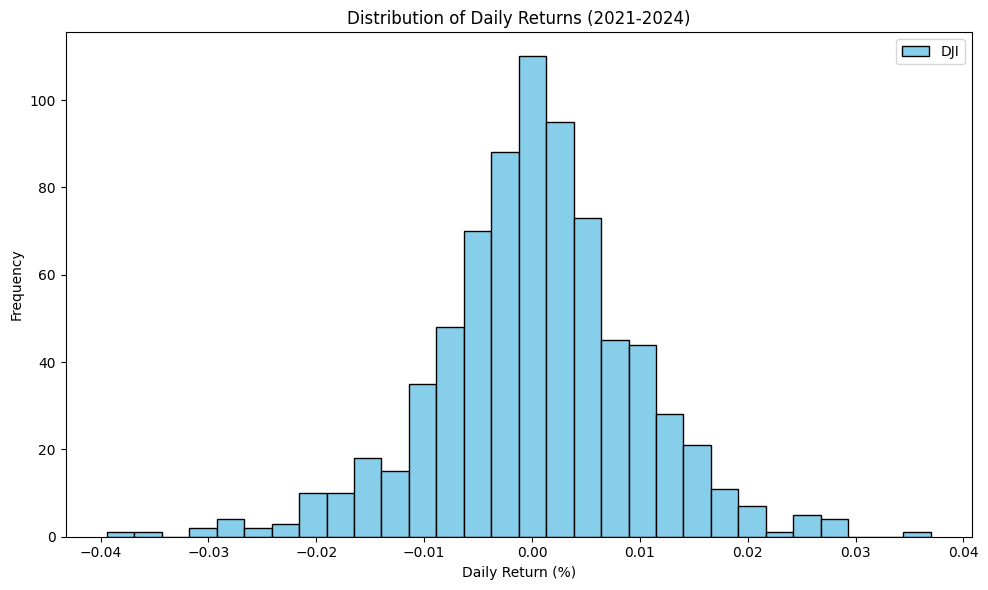

In [202]:
# 3. Use Seaborn or Matplotlib to visualize the distribution of daily returns through a histogram
import matplotlib.pyplot as plt
import numpy as np

# Drop NaN values before plotting (from the first day since pct_change creates NaN for the first entry)
daily_returns_cleaned = daily_returns.dropna()
mean_value = np.mean(daily_returns_cleaned)

#Creating Histogram
plt.figure(figsize=(10,6))
plt.hist(daily_returns_cleaned, bins = 30, color='skyblue', edgecolor = 'black', label='DJI')
plt.legend()

# Add title and labels
plt.title('Distribution of Daily Returns (2021-2024)')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

## Question 4: Volatility Analysis
### Objective: 
- Compute and analyze the rolling volatility of the ^DJI index over a specified window.

### Instructions:

- Calculate the rolling standard deviation for a specified window (e.g., 21 days) to estimate volatility.
- Plot and analyze periods of high and low volatility.

In [203]:
'Rolling Standard Deviation tracks how much a set of data points deviate from their average over a specific time period (window)'
'High volatility means the price changes rapidly and unpredictably over a short period of time, i.e., $100 -> $110 -> $80'
'Low volatility means price is stable, i.e., $90 -> $90.5 -> $90.25'

# 4. Calculate the rolling standard deviation for a specified window (e.g., 21 days) to estimate volatility
# Calculate the 21-day rolling standard deviation to estimate volatility

rolling_volatility = daily_returns_cleaned.rolling(window=21).std()
rolling_volatility = rolling_volatility.dropna() # Null values may mess up the bar graph, so remove them
rolling_volatility # We would expect the first 21 days to be blank here



Ticker,^DJI
Date,
2021-02-03,0.009166
2021-02-04,0.009371
2021-02-05,0.008877
2021-02-08,0.008906
2021-02-09,0.008903
...,...
2023-12-22,0.005936
2023-12-26,0.005944
2023-12-27,0.005856


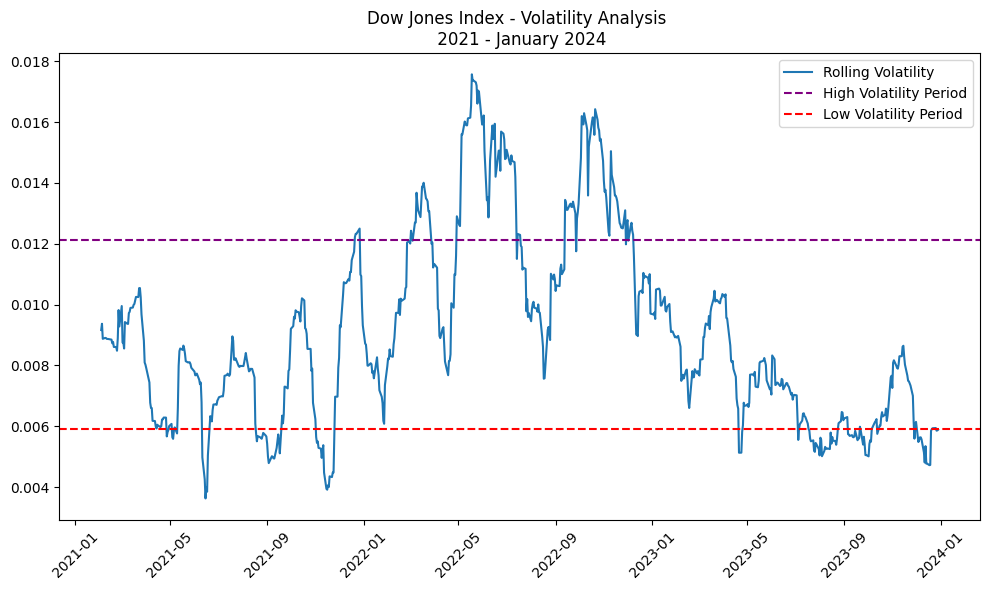

In [204]:
# 4. Creating chart to demonstrate periods of high and low volatility

# Set the volatility threshold. so its showing that if youre one SD of volatility away from how much volatility is one average youre high
high_volatility_threshold = (rolling_volatility.mean() + rolling_volatility.std()).item()
low_volatility_threshold = (rolling_volatility.mean() - rolling_volatility.std()).item()

plt.figure(figsize= (10, 6))
plt.plot(rolling_volatility.index, rolling_volatility, label = 'Rolling Volatility')
plt.axhline(y=high_volatility_threshold, color = 'purple', linestyle = '--', label = 'High Volatility Period')
plt.axhline(y=low_volatility_threshold, color = 'red', linestyle = '--',  label = 'Low Volatility Period')
plt.title('Dow Jones Index - Volatility Analysis \n 2021 - January 2024')
plt.xticks(rotation = 45)
plt.legend()
plt.tight_layout()
plt.show()

## Question 5: Cumulative Return Analysis
### Objective: 
- Analyze the cumulative return of the ^DJI index for the given time period.

### Instructions:

- Calculate the cumulative daily returns.
- Use Matplotlib to visualize the cumulative return over the given period.

In [205]:
# 5. Calculate the cumulative daily returns
# Calculate daily returns (percentage change)
daily_returns = closing_price.pct_change()
cumulative_returns = (1 + daily_returns).cumprod()
cumulative_returns

Ticker,^DJI
Date,
2021-01-04,NaN
2021-01-05,1.005549
2021-01-06,1.020034
2021-01-07,1.027040
2021-01-08,1.028920
...,...
2023-12-22,1.236967
2023-12-26,1.242240
2023-12-27,1.245919


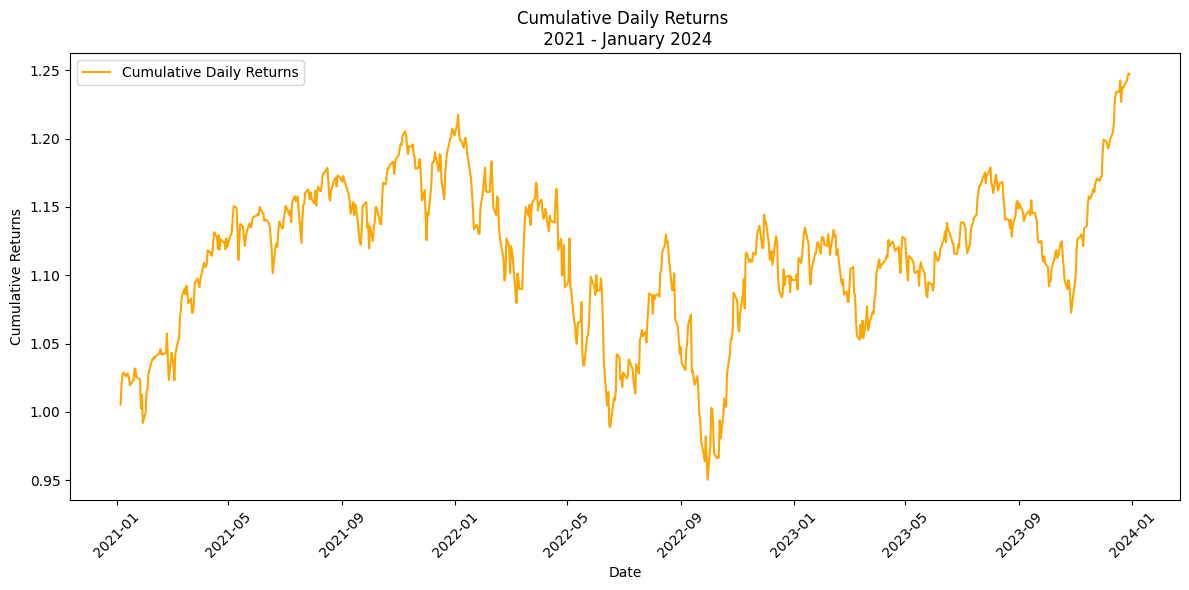

In [206]:
# 5. Use Matplotlib to visualize the cumulative return over the given period
# Plot the cumulative daily returns

plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns.index, cumulative_returns.values, label='Cumulative Daily Returns', color='orange')

# Add title and labels
plt.title('Cumulative Daily Returns \n 2021 - January 2024')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Question 6: Month-wise Performance Analysis
### Objective: 
- Evaluate the performance of the ^DJI index on a monthly basis.

### Instructions:

- Resample the data to a monthly time frame and calculate monthly returns.
- Visualize monthly returns using a bar chart and identify patterns or anomalies.

In [207]:
# 6. Resample the data to a monthly time frame and calculate monthly returns

month_sample = closing_price.resample('ME').last()
month_returns = month_sample.pct_change()
month_returns_cleaned = month_returns.dropna()

month_returns_cleaned.isna()


Ticker,^DJI
Date,
2021-02-28,False
2021-03-31,False
2021-04-30,False
2021-05-31,False
2021-06-30,False
2021-07-31,False
2021-08-31,False
2021-09-30,False
2021-10-31,False


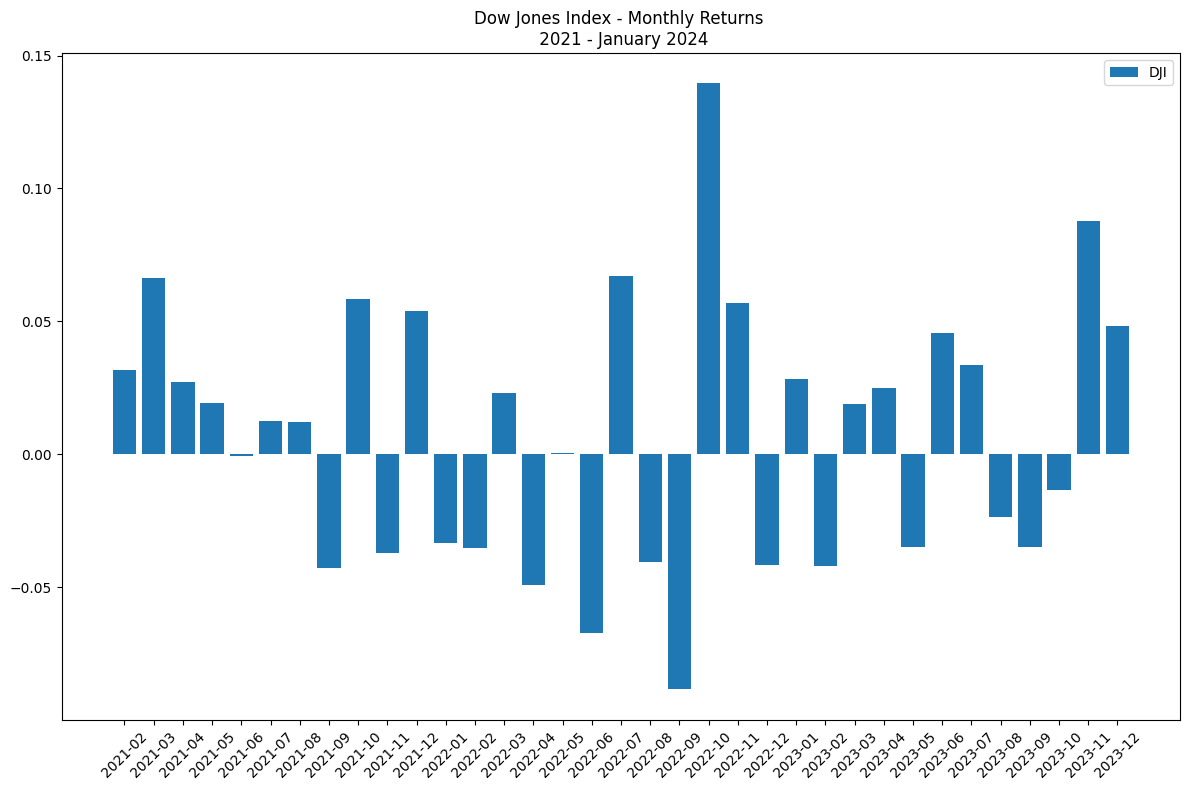

In [208]:
'For a Bar Graph, we must first extract data-month pairs (from month_returns_cleaned), the data should be flattened, or 1D (month_returns.index)'
# 6. Visualize monthly returns using a bar chart and identify patterns or anomalies

# Extract Month-Year pairs, flatten values to fit the bar chart
month_year_label = month_returns_cleaned.index.strftime('%Y-%m')
x_axis_len = range(len(month_returns_cleaned))
data_values = month_returns_cleaned.values.flatten()

# Creating the bar chart
plt.figure(figsize=(12,8))
plt.bar(month_year_label, data_values, label = 'DJI')
plt.title('Dow Jones Index - Monthly Returns \n 2021 - January 2024')
plt.xticks(x_axis_len, rotation = 45)
plt.tight_layout()
plt.legend()
plt.show()



6. Identify patterns or anomalies.

Key Patterns and Observations:

Volatility in 2021:
The returns are relatively stable between February - April 2021. In May 2021, we see a huge drop in the monthly returns, however, they still stay positive. In August 2021, we see the returns fall ~0.05%. The market keeps fluctuating until November 2021, after which the market declines again for two consecutive months. 

Sharp spikes in June, September, and October 2022: 
Returns decline by ~0.07% in June 2022 as seen above. The market immediately spikes back up, only to see another sharp downward trend in September 2022, which is also the highest over 2021 - December 2023, suggesting a major shock to the market. A massive positive spike in October 2022 suggests that we may have been going through a period of massive economic uncertainity, like Trump's tariffs, which caused the market to have sharp spikes within a months span.

Following October 2022, the market fluctuates, until it start recovering in November 2023. Note that the returns fall again in december 2023, so we may still have been in a volatile period in 2023.


In [209]:
# 6. Identify patterns or anomalies

# Drop NaN values from the monthly returns
monthly_returns_cleaned = monthly_returns.dropna()

# Ensure the index is in datetime format
monthly_returns_cleaned.index = pd.to_datetime(monthly_returns_cleaned.index)

# Create a numeric range for the x-axis
month_numbers = list(range(len(monthly_returns_cleaned)))

# Create formatted date labels for the x-axis
monthly_labels = monthly_returns_cleaned.index.strftime('%Y-%m')

# Flatten the values to ensure they are 1D
monthly_returns_flat = monthly_returns_cleaned.values.flatten()

# Calculate mean and standard deviation of the monthly returns
mean_return = monthly_returns_cleaned.mean()
std_return = monthly_returns_cleaned.std()

# Calculate z-scores for each monthly return
z_scores = (monthly_returns_cleaned - mean_return) / std_return

# Identify anomalies (returns more than 2 standard deviations from the mean)
anomalies = z_scores[np.abs(z_scores) > 2]

# Plot the bar chart using the numeric range for the x-axis
plt.figure(figsize=(12, 6))
plt.bar(month_numbers, monthly_returns_flat, color='orange')

# Plot the 3-month moving average
moving_avg = monthly_returns_cleaned.rolling(window=3).mean().values.flatten()
plt.plot(month_numbers, moving_avg, color='blue', label='3-Month Moving Average', linewidth=2)

# Set the x-axis labels to the formatted year-month strings
plt.xticks(month_numbers, monthly_labels, rotation=45)

# Add title and labels
plt.title('Monthly Returns with Moving Average (2021-2024)')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Monthly Returns')

# Add a legend
plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

NameError: name 'monthly_returns' is not defined

## Question 7: Historical High and Low Price Analysis
### Objective: 
- Analyze periods where the ^DJI index achieved historical highs and lows.

### Instructions:

- Identify dates where the ^DJI index achieved historical highs and lows.
- Use Matplotlib to visualize these points on the price chart.

In [ ]:
import numpy as np 
import pandas as pd

# 7. Identify dates where the ^DJI achieved historical highs and lows
data['cum_max'] = closing_price.values
data['close_min'] = closing_price.values

data['Historical_High'] = data['cum_max'].cummax()
data['Historical_Low'] = data['close_min'].cummin()

high_val = max(data['Historical_High'])
low_val = min(data['Historical_Low'])

date_of_high = data['Historical_High'].idxmax() #returns date for the highest value
date_of_low = data['Historical_Low'].idxmin() #returns date for the lowest value

print(f"Historical high price was {high_val} on date {date_of_high}") #{} and f turns the value in the variable into a string so now you can write it without having to get in and out of commas
print(f"Historical low price was {low_val} on date {date_of_low}") #{} and f turns the value in the variable into a string

Historical high price was 37710.1015625 on date 2023-12-28 00:00:00
Historical low price was 28725.509765625 on date 2022-09-30 00:00:00


In [ ]:
#Another, easier way of doing this:

data['highest_val'] = data['cum_max'].cummax()
data['lowest_val'] = data['close_min'].cummax()

#getting the latest high and low

latest_high = max(highest_val)
latest_low = min(lowest_val)

highest_date = data['cum_max'].idxmax()
lowest_date = data['close_min'].idxmin()

print(f"Historical high price was {latest_high} on date {highest_date}") #{} and f turns the value in the variable into a string so now you can write it without having to get in and out of commas
print(f"Historical low price was {latest_low} on date {lowest_date}")


Historical high price was 37710.1015625 on date 2023-12-28 00:00:00
Historical low price was 30223.890625 on date 2022-09-30 00:00:00


Historical high price was 37710.1015625 on date 2023-12-28 00:00:00
Historical low price was 30223.890625 on date 2022-09-30 00:00:00


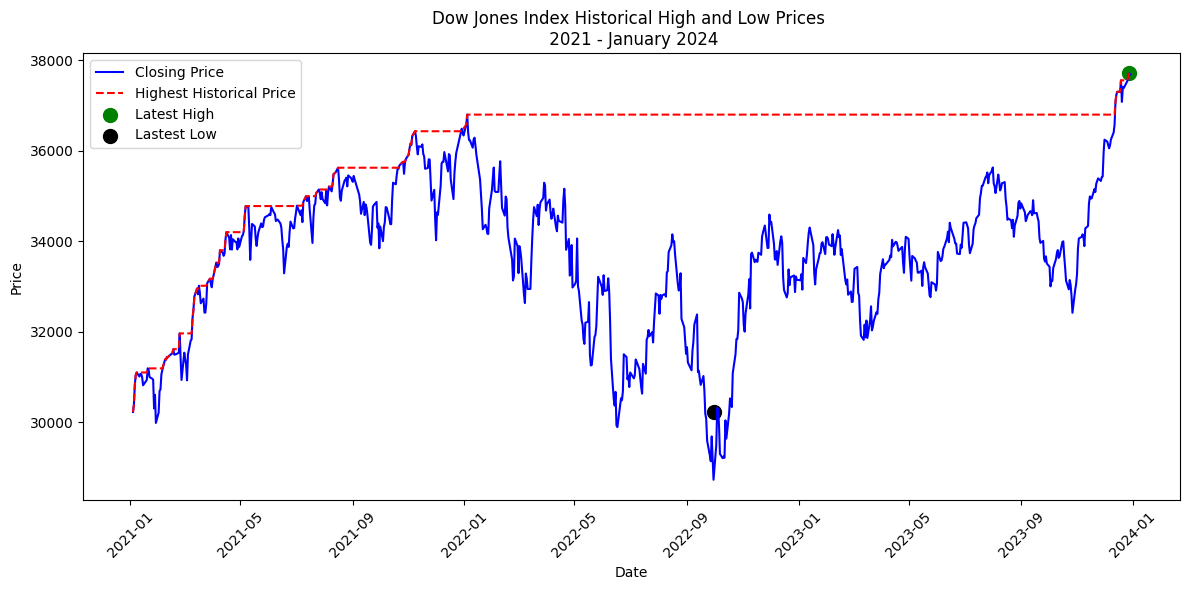

In [ ]:
# 7. Use Matplotlib to visualize these points on the price chart

# Create a figure
plt.figure(figsize=(12,6))
plt.plot(closing_price.index, closing_price.values, label = 'Closing Price', color = 'blue')
plt.plot(data.index, data['highest_val'], linestyle = '--', color = 'red', label = 'Highest Historical Price')
plt.scatter(highest_date, latest_high, color = 'green', s = 100, label = 'Latest High')
plt.scatter(lowest_date, latest_low, color = 'black', s= 100, label = 'Lastest Low')
plt.title("Dow Jones Index Historical High and Low Prices \n 2021 - January 2024")
plt.xticks(rotation = 45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.tight_layout()
plt.legend()

# Outputting the textual results, too

print(f"Historical high price was {latest_high} on date {highest_date}") 
print(f"Historical low price was {latest_low} on date {lowest_date}")

## Question 8: Comparing Volume and Closing Price Trends
### Objective: 
- Visualize and analyze how the trading volume relates to the closing price movement.

## Instructions:

- Plot a dual-axis plot with one axis representing the closing prices and the other representing the volume.
- Ensure clarity, add titles, legends, and labels.

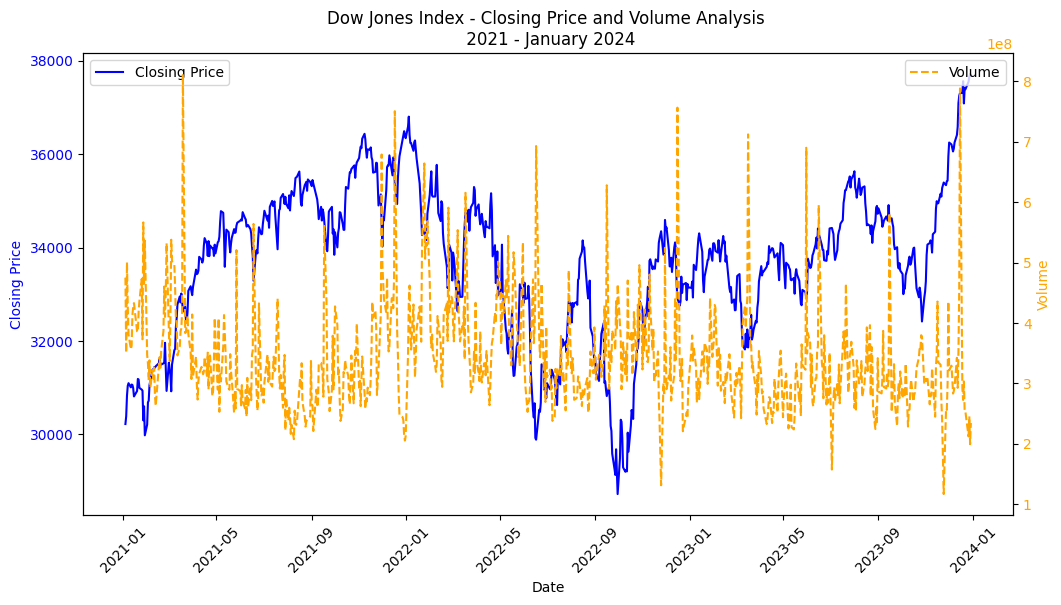

Price,Close,High,Low,Open,Volume
Ticker,^DJI,^DJI,^DJI,^DJI,^DJI
Date,,,,,
2021-01-04,30223.890625,30674.279297,29881.820312,30627.470703,475080000
2021-01-05,30391.599609,30504.890625,30141.779297,30204.250000,350910000
2021-01-06,30829.400391,31022.650391,30313.070312,30362.779297,500430000
2021-01-07,31041.130859,31193.400391,30897.859375,30901.179688,427810000
2021-01-08,31097.970703,31140.669922,30793.269531,31069.580078,381150000
...,...,...,...,...,...
2023-12-22,37385.968750,37534.519531,37268.878906,37349.269531,252970000
2023-12-26,37545.328125,37617.988281,37371.828125,37405.898438,212420000


In [ ]:
# 8. Plot a dual-axis plot with one axis representing the closing prices and the other representing the volume. Dual axis means that you have a primary and a secondary y-axis. ax1 (left-axis is the primary) and ax2 (right axis) is the secondary

# Create the figure size
plt.figure(figsize=(12, 6))

# Set a primary axis first
ax1 = plt.subplot()

# Creating ax1 (left-axis) first
ax1.plot(closing_price.index, closing_price.values, color = 'blue', label = 'Closing Price')
ax1.set_ylabel('Closing Price', color = 'blue')
ax1.tick_params(axis='y', labelcolor = 'blue')
ax1.tick_params(axis='x', rotation = 45)
ax1.set_xlabel('Date')
plt.legend()

# Creating ax2 (right axis)
ax2 = ax1.twinx()
ax2.plot(data.index, data['Volume'], linestyle = '--', color = 'orange', label = 'Volume')
ax2.set_ylabel('Volume', color = 'orange')
ax2.tick_params(axis='y', labelcolor ='orange')
ax2.tick_params(axis='x', rotation = 45)
ax2.set_xlabel('Date')
plt.legend()

plt.title('Dow Jones Index - Closing Price and Volume Analysis \n 2021 - January 2024')
plt.show()
data


## Question 9: Heatmap of Monthly Average Closing Prices
### Objective: 
- Visualize the monthly average closing prices over the years.

### Instructions:

- Aggregate data to calculate the average closing prices for each month across years.
- Create a heatmap to visualize these averages.

In [ ]:
# 9. Aggregate data to calculate the average closing prices for each month across years
# Resample the data first to Month-Year only - this is to calculate monthly averages by year

data_resample = data['Close'].resample('ME').mean()

# Calculating the average for months across the years only
monthly_average = data_resample.groupby(data_resample.index.month).mean()

# Creating a dictionary to map month names to digits
months = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
monthly_average.index = monthly_average.index.map(months)

print(f'The average closing price across months: {monthly_average} ')


The average closing price across months: Date
January      33311.165837
February     33193.548965
March        32962.170007
April        33949.852116
May          33322.191227
June         33213.865319
July         33703.775950
August       34378.062459
September    33218.957220
October      32981.898119
November     34657.010448
December     35357.172867
Name: Close, dtype: float64 


In [ ]:
# 9. Create a heatmap to visualize these averages


## Question 10: Histogram of Daily Price Changes
### Objective: 
- Visualize and analyze the distribution of daily price changes.

### Instructions:

- Calculate the daily price changes.
- Plot a histogram and analyze the distribution to understand the volatility and regular movement.

In [ ]:
# 10. Calculate the daily price changes
# I will create a loop that goes over the data observations and calculate the difference between prices

data['Daily_Price_Change'] = 0 
for i in range(1, len(data)):
    data['Daily_Price_Change'].iloc[i] = data['Close'].iloc[i] - data['Close'].iloc[i-1]

Daily_Price_Change = data['Daily_Price_Change']
Daily_Price_Change

/var/folders/y_/0vg5mwbj3qv394qthfv5h84c0000gn/T/ipykernel_1582/3504080209.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Daily_Price_Change'].iloc[i] = data['Close'].iloc[i] - data['Close'].iloc[i-1]
/var/folders/y_/0vg5mwbj3qv39

Date
2021-01-04      0.000000
2021-01-05    167.708984
2021-01-06    437.800781
2021-01-07    211.730469
2021-01-08     56.839844
                 ...    
2023-12-22    -18.382812
2023-12-26    159.359375
2023-12-27    111.191406
2023-12-28     53.582031
2023-12-29    -20.562500
Name: Daily_Price_Change, Length: 753, dtype: float64

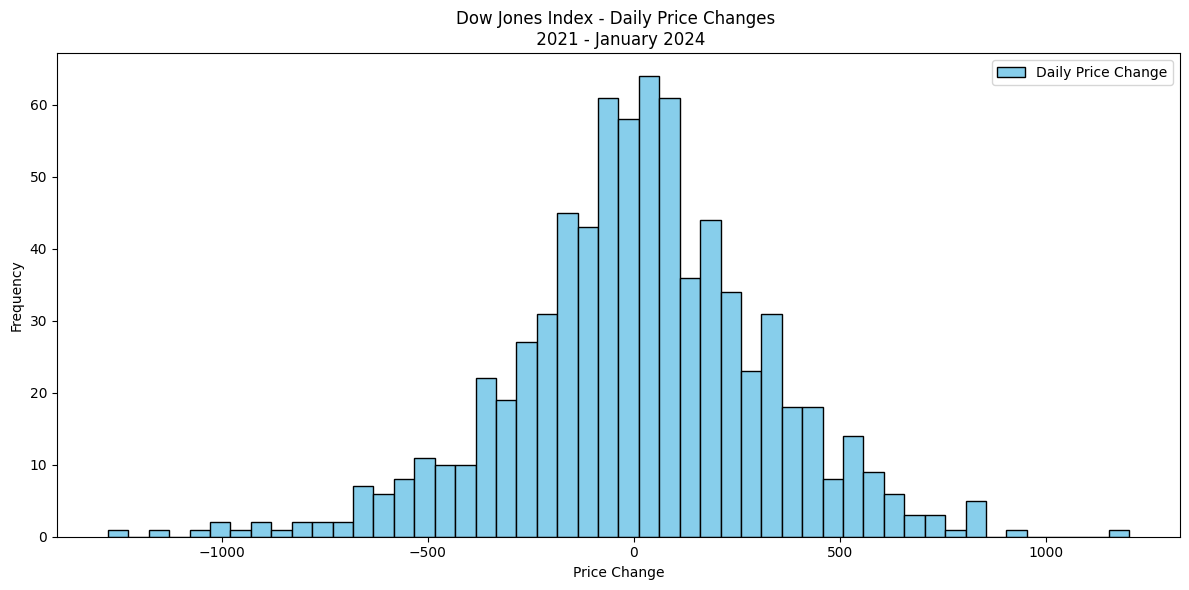

In [ ]:
# 10. Plot a histogram and analyze the distribution to understand the volatility and regular movement
# Plot the histogram

plt.figure(figsize=(12,6))
plt.hist(Daily_Price_Change, bins = 50, color = 'skyblue', edgecolor = 'black', label = 'Daily Price Change')
plt.title('Dow Jones Index - Daily Price Changes \n 2021 - January 2024')
plt.xlabel('Price Change')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

10. Analyze the distribution to understand volatility and regular movement

I believe the distribution is fairly symmetrical around 0, with the highest frequency of changes clustering around -350 and 350. This suggests that the price changes are relatively balanced, meaning the market experiences fluctuations both upward and downward. 

We also notice that the tail is narrow, suggesting that there are few extreme values. This supports the analogy that the index is relatively stable and there is low volatility. 

There is a strong peak around 0 (from -100 to +100), suggesting that prices are relatively stable and the major price changes are between -100 and 100

Although the majority of price changes are close to 0, the fact that the tails extend out to -1000 and +1000 means that there are some instances of higher volatility.
These outliers indicate occasional sharp movements, which may have been driven by macroeconomic events, earnings announcements, or other market-moving news.

The highest frequency of daily price changes is concentrated between -250 and +250, indicating that most daily changes are within this range. This is a reasonable range for normal fluctuations in the Dow Jones Index.

